In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

warnings.filterwarnings('ignore')

train_path = os.path.join('data','train.csv')
test_path = os.path.join('data','test.csv')
bus_bts = os.path.join('data','bus_bts.csv')

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
bus_bts = pd.read_csv(bus_bts)

In [2]:
from matplotlib import rc, font_manager, rcParams
font=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font)
rcParams['axes.unicode_minus'] = False

In [3]:
import chart_studio.plotly.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.17.0


In [4]:
import folium # 지도 관련 시각화
from folium.plugins import MarkerCluster

In [5]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
pd.set_option('display.width',600)

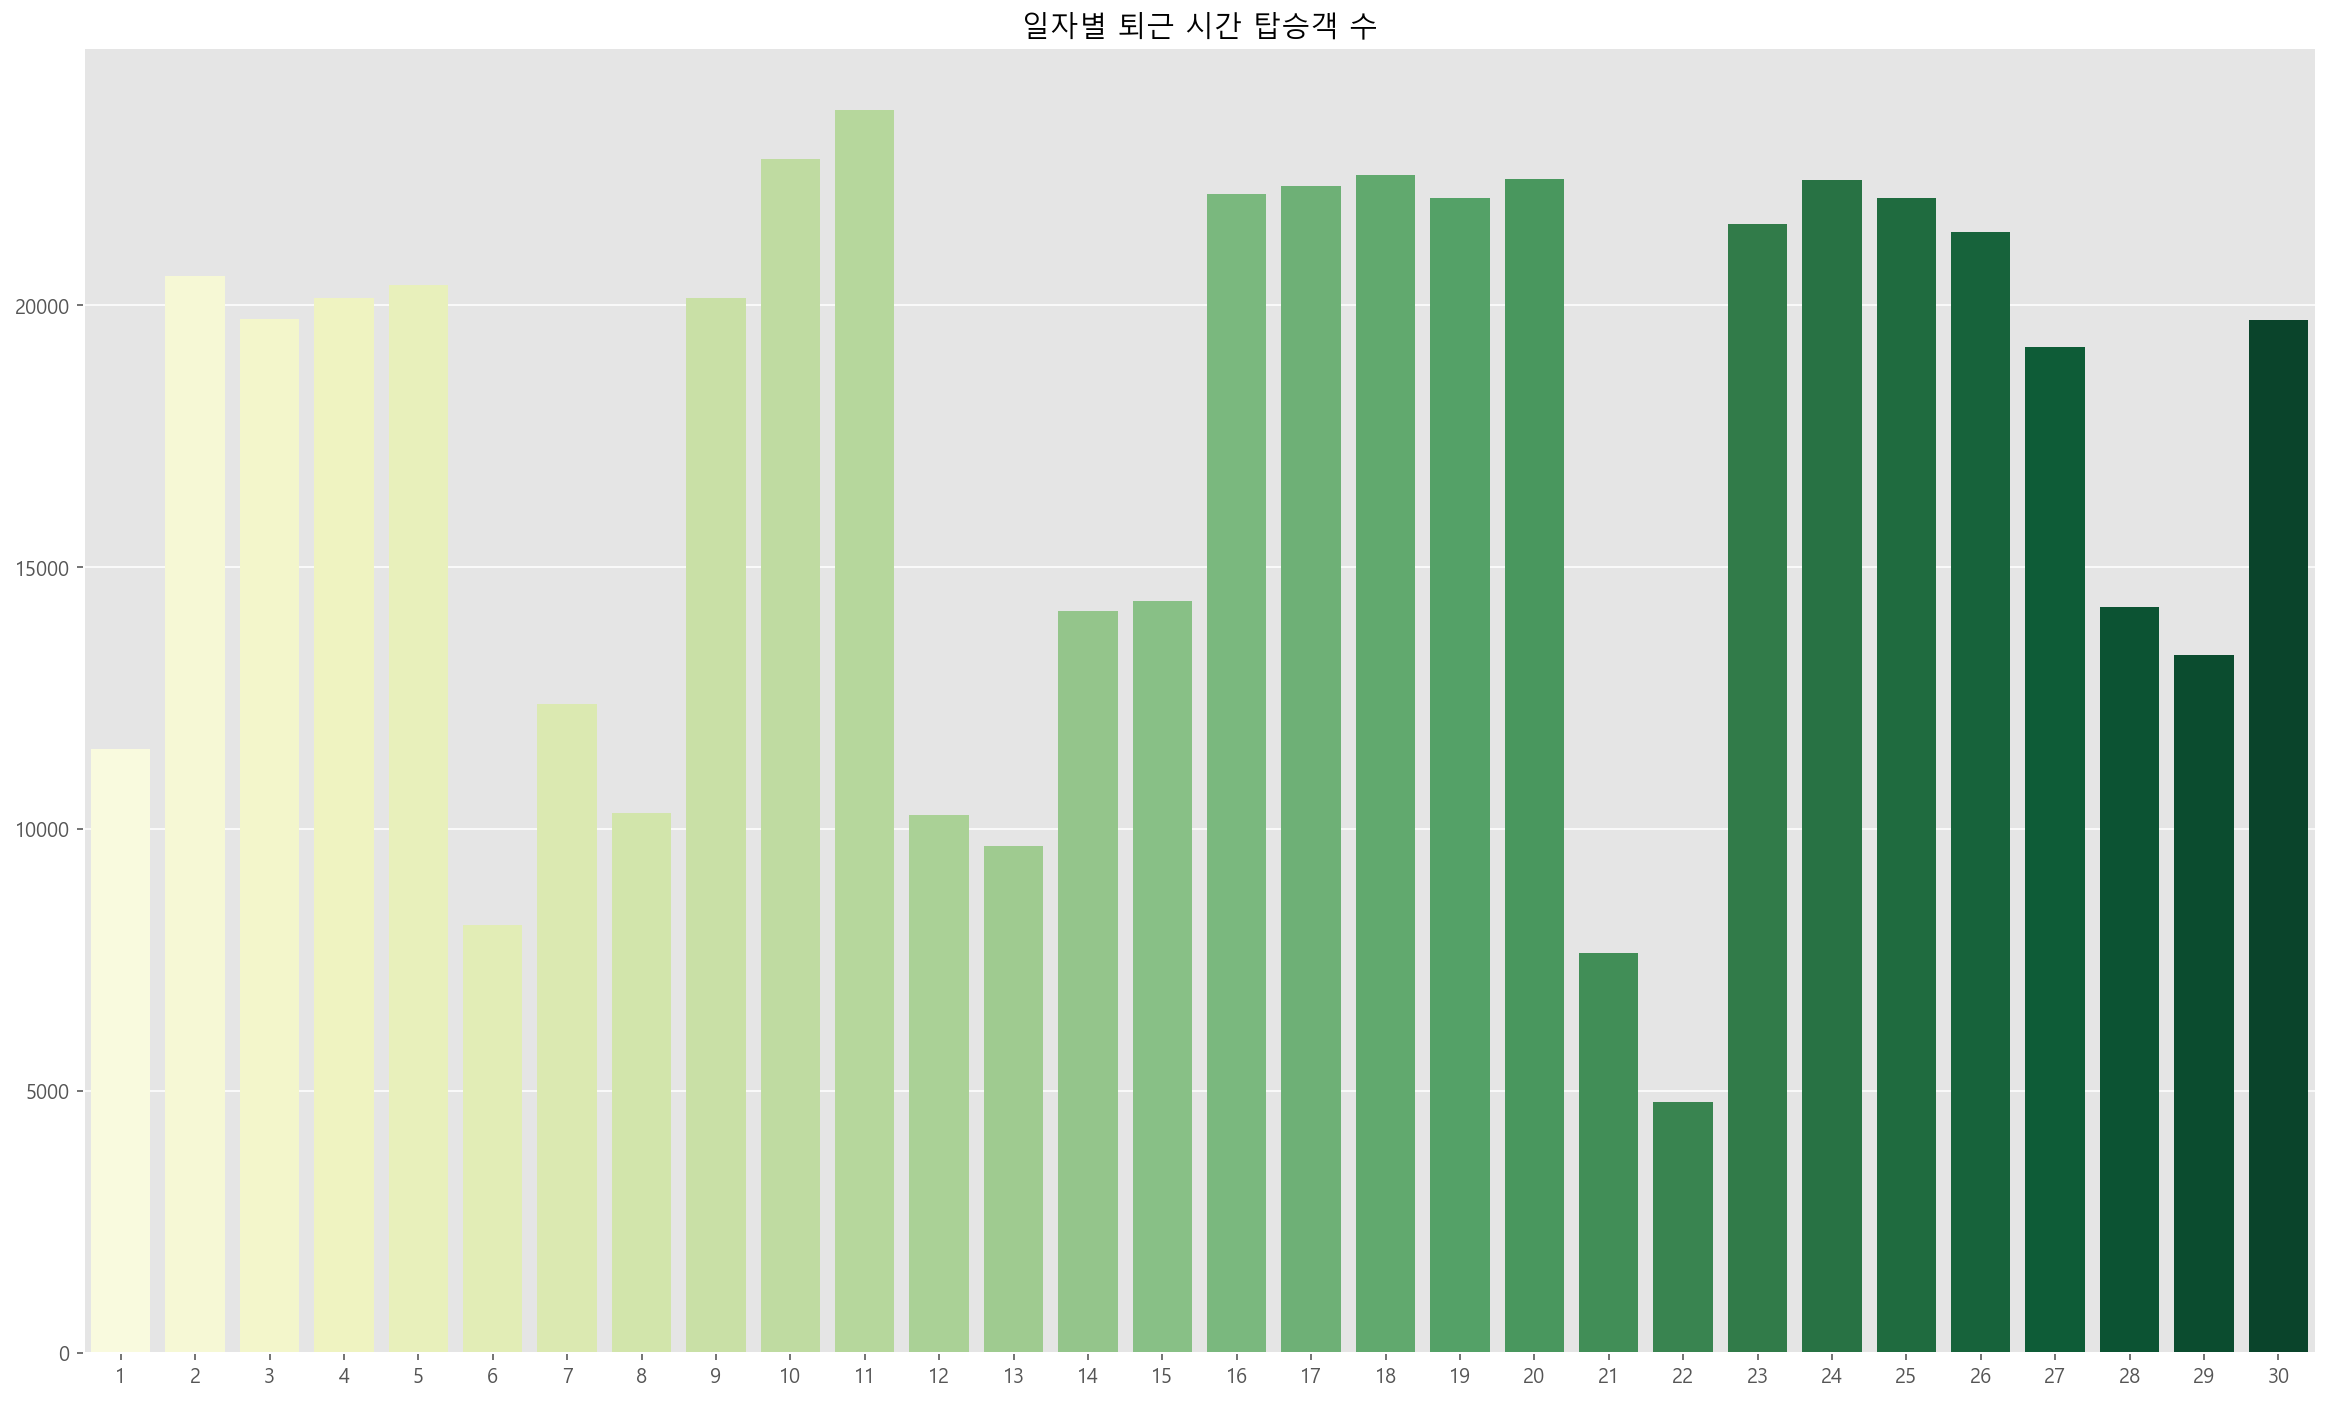

In [6]:
date_18sum = train.groupby('date')['18~20_ride'].sum()
plt.figure(figsize=(20,12))
sns.barplot(x = np.arange(1,31), y= date_18sum.values, palette='YlGn')
plt.title('일자별 퇴근 시간 탑승객 수')
plt.show()

### 주말, 공휴일, 태풍 불었던 날 승객이 확연히 적다

In [7]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
len(set(train['bus_route_id']))

613

In [9]:
a = train.groupby('bus_route_id')['18~20_ride'].mean()
a = a[a.values > 1.24209540636893]

In [10]:
a = np.array(a.index)

In [11]:
byroute = train.groupby(['date','bus_route_id'])['18~20_ride'].mean().unstack()
byroute.fillna(0.0, inplace=True)

In [12]:
idx = []
value = []
for i, col in enumerate(byroute.columns):
    idx.append(col)
    value.append(byroute[col].mean())

In [13]:
byroute_2 = pd.DataFrame(columns=['index', 'value'])
byroute_2['index'] = idx
byroute_2['value'] = value

In [14]:
byroute_2 = byroute_2.sort_values(ascending=False,by='value')
byroute_2

,index,value
158,23620000,16.224139
157,23610000,14.956677
154,23580000,13.632892
153,23570000,12.275334
94,22530000,6.061792
93,22520000,5.736279
3,8170000,4.982971
579,32360000,4.879577
103,23000000,4.707214
577,32340000,4.558485


In [15]:
b = list(byroute_2['index'][:10])

In [16]:
byroute.loc[:,b].iplot(title='평균 승객 가장 많은 경로 번호 TOP 10')

### 흐름이 비슷한 것으로 보아 경로가 많이 겹칠 것으로 예상
### 탑 5 의 경로를 확인해 보자

In [17]:
train[train['bus_route_id'] == 23620000]

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
3634,3634,2019-09-01,23620000,시내,117,남국사,33.46049,126.54979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3635,3635,2019-09-01,23620000,시내,119,죽성마을입구,33.46313,126.54910,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
3636,3636,2019-09-01,23620000,시내,121,제주대학교병원,33.46909,126.54739,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,3.0,3.0,0.0,0.0
3637,3637,2019-09-01,23620000,시내,123,인다마을,33.47145,126.54540,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,3.0,5.0,0.0
3638,3638,2019-09-01,23620000,시내,125,아라주공아파트,33.47366,126.54542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,8.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403990,403990,2019-09-30,23620000,시내,3272,고산동산(아라방면),33.49600,126.53228,0.0,6.0,13.0,13.0,19.0,12.0,0.0,2.0,1.0,8.0,13.0,9.0,5.0
403991,403991,2019-09-30,23620000,시내,3274,제주지방법원(아라방면),33.49311,126.53509,0.0,2.0,6.0,5.0,13.0,5.0,2.0,4.0,2.0,3.0,7.0,7.0,13.0
403992,403992,2019-09-30,23620000,시내,3276,제주중앙여자고등학교(아라방면),33.48941,126.53864,0.0,3.0,6.0,7.0,8.0,1.0,0.0,1.0,2.0,6.0,2.0,8.0,10.0
403993,403993,2019-09-30,23620000,시내,3278,제주여자중고등학교(아라방면),33.48486,126.54293,1.0,0.0,9.0,0.0,8.0,1.0,0.0,6.0,6.0,3.0,5.0,6.0,2.0


In [18]:
#정류장의 위치만 확인하기 위해 groupby를 실행함
data = train[train['bus_route_id'] == 23620000]
data = data[['latitude', 'longitude','station_name']].drop_duplicates(keep='first')
data2 = data.groupby(['station_name'])['latitude','longitude'].mean()

map_osm= folium.Map((33.399835, 126.506031),zoom_start=10)
mc = MarkerCluster()
# fg = folium.FeatureGroup(name='23620000 line')
for row in data2.itertuples():
    map_osm.add_child(folium.Marker(location=[row.latitude, row.longitude],popup=row.index))
map_osm

In [19]:
data1 = train[train['bus_route_id'] == 23620000]
data1 = data1[['latitude', 'longitude','station_name']].drop_duplicates(keep='first')
data1 = data1.groupby(['station_name'])['latitude','longitude'].mean()
data2 = train[train['bus_route_id'] == 23610000]
data2 = data2[['latitude', 'longitude','station_name']].drop_duplicates(keep='first')
data2 = data2.groupby(['station_name'])['latitude','longitude'].mean()
data3 = train[train['bus_route_id'] == 23580000]
data3 = data3[['latitude', 'longitude','station_name']].drop_duplicates(keep='first')
data3 = data3.groupby(['station_name'])['latitude','longitude'].mean()
data4 = train[train['bus_route_id'] == 23570000]
data4 = data4[['latitude', 'longitude','station_name']].drop_duplicates(keep='first')
data4 = data4.groupby(['station_name'])['latitude','longitude'].mean()
data5 = train[train['bus_route_id'] == 22530000]
data5 = data5[['latitude', 'longitude','station_name']].drop_duplicates(keep='first')
data5 = data5.groupby(['station_name'])['latitude','longitude'].mean()

In [20]:
map_group= folium.Map((33.399835, 126.506031),zoom_start=10)
f_group = folium.FeatureGroup(name='평균 승객 Top 5')
map_group.add_child(f_group)

g1 = folium.plugins.FeatureGroupSubGroup(f_group, '23620000 노선')
map_group.add_child(g1)
g2 = folium.plugins.FeatureGroupSubGroup(f_group, '23610000 노선')
map_group.add_child(g2)
g3 = folium.plugins.FeatureGroupSubGroup(f_group, '23580000 노선')
map_group.add_child(g3)
g4 = folium.plugins.FeatureGroupSubGroup(f_group, '23570000 노선')
map_group.add_child(g4)
g5 = folium.plugins.FeatureGroupSubGroup(f_group, '22530000 노선')
map_group.add_child(g5)

for row in data1.itertuples():
    folium.Marker(location=[row.latitude, row.longitude],popup=row.index).add_to(g1)

for row in data2.itertuples():
    folium.Marker(location=[row.latitude, row.longitude],popup=row.index).add_to(g2)

for row in data3.itertuples():
    folium.Marker(location=[row.latitude, row.longitude],popup=row.index).add_to(g3)

for row in data4.itertuples():
    folium.Marker(location=[row.latitude, row.longitude],popup=row.index).add_to(g4)

for row in data5.itertuples():
    folium.Marker(location=[row.latitude, row.longitude],popup=row.index).add_to(g5)
    
folium.LayerControl(collapsed=False).add_to(map_group)

In [21]:
map_group

### 가장 승객이 많은 경로의 버스는 제주시와 서귀포시를 중심으로 운행하는 버스 이거나 제주시, 서귀포시를 오고 가는 버스

### 출근 시간을 6\~9시로 가정하고 6\~9시 탑승객을 알아보자

In [22]:
train_c = train.copy()

In [23]:
train_c['6~9_ride'] = train_c['6~7_ride'] + train_c['7~8_ride'] + train_c['8~9_ride']

In [24]:
train_c.head(2)

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,6~9_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,9.0


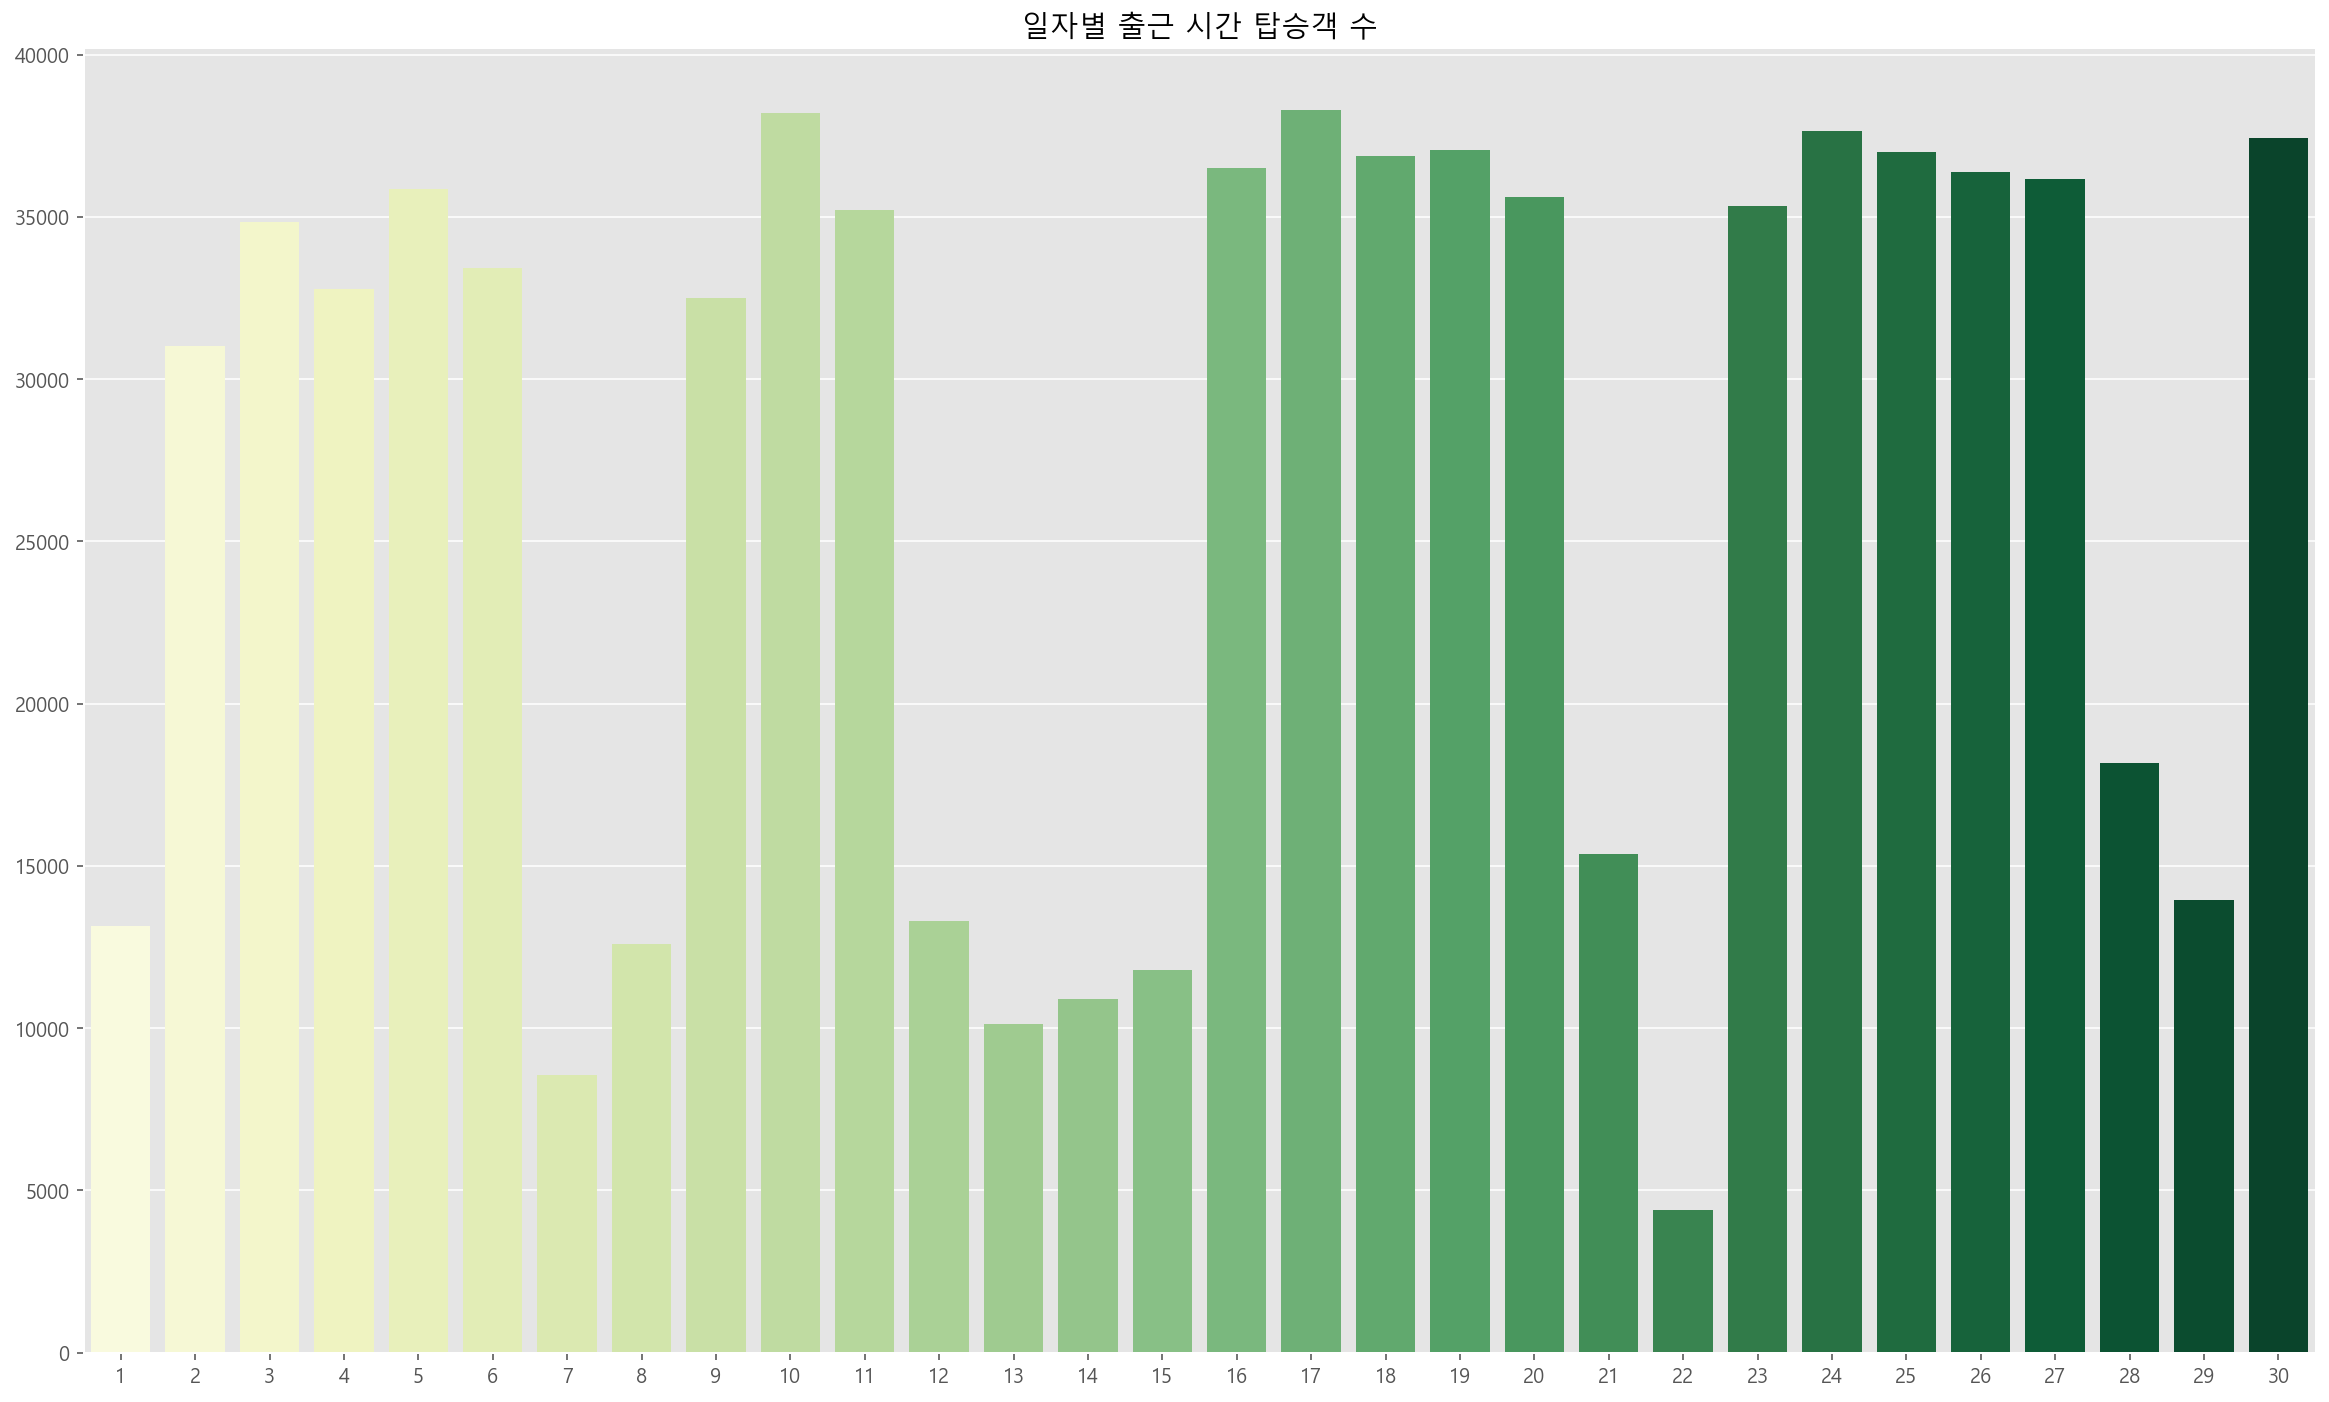

In [25]:
date_69sum = train_c.groupby('date')['6~9_ride'].sum()
plt.figure(figsize=(20,12))
sns.barplot(x = np.arange(1,31), y= date_69sum.values, palette='YlGn')
plt.title('일자별 출근 시간 탑승객 수')
plt.show()

### 613개 루트 BOX_PLOT

In [26]:
bus_routes = train_c.groupby(['bus_route_id','date'])['18~20_ride'].sum().reset_index()

In [27]:
bus_routes.pivot_table('18~20_ride', index='date', columns='bus_route_id').iplot(kind='box', x='bus_route_id')

In [28]:
bus_route_pivot = bus_routes.pivot_table('18~20_ride', index='date', columns='bus_route_id')
bus_route_pivot = bus_route_pivot.fillna(0)

In [29]:
bus_route_pivot.head()

bus_route_id,4270000,4280000,7990000,8170000,8180000,17010000,20010000,20040000,20050000,21000000,21010000,21020000,21040000,21070000,21080000,21090000,21100000,21110000,21120000,21150000,21160000,21180000,21200000,21220000,21230000,21270000,21290000,21300000,21310000,21330000,21340000,21350000,21360000,21370000,21390000,21400000,21410000,21420000,21430000,21440000,21450000,21460000,21470000,21480000,21500000,21520000,21540000,21550000,21570000,21580000,...,32190000,32200000,32210000,32220000,32230000,32240000,32250000,32260000,32270000,32280000,32290000,32310000,32320000,32330000,32340000,32350000,32360000,32370000,32380000,32390000,32400000,32420000,32460000,32470000,32480000,32490000,32500000,32510000,32520000,32550000,32560000,32570000,32580000,32590000,32610000,32620000,32630000,32640000,32660000,32670000,32680000,32690000,32700000,32710000,32730000,32740000,32760000,32770000,32810000,32820000
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-01,79.0,80.0,0.0,118.0,6.0,0.0,1.0,0.0,0.0,63.0,69.0,0.0,0.0,0.0,38.0,21.0,13.0,13.0,0.0,0.0,0.0,20.0,0.0,21.0,24.0,21.0,22.0,8.0,0.0,0.0,0.0,10.0,1.0,0.0,7.0,4.0,45.0,84.0,33.0,26.0,0.0,5.0,0.0,95.0,0.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,0.0,0.0,6.0,52.0,0.0,79.0,53.0,27.0,12.0,10.0,0.0,7.0,0.0,2.0,10.0,12.0,16.0,1.0,0.0,0.0,0.0,0.0,11.0,0.0,14.0,1.0,3.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-02,92.0,54.0,0.0,49.0,17.0,0.0,5.0,0.0,0.0,92.0,56.0,0.0,0.0,0.0,42.0,28.0,20.0,9.0,0.0,0.0,0.0,29.0,0.0,18.0,19.0,22.0,27.0,23.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,1.0,46.0,59.0,19.0,7.0,0.0,8.0,0.0,114.0,0.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,35.0,107.0,0.0,134.0,115.0,70.0,23.0,17.0,8.0,11.0,0.0,2.0,8.0,6.0,27.0,10.0,0.0,0.0,0.0,0.0,16.0,0.0,26.0,4.0,18.0,12.0,7.0,13.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-03,65.0,69.0,0.0,55.0,10.0,0.0,16.0,0.0,0.0,60.0,70.0,0.0,0.0,0.0,45.0,24.0,29.0,24.0,0.0,0.0,0.0,13.0,0.0,18.0,18.0,14.0,12.0,11.0,0.0,0.0,0.0,9.0,6.0,0.0,7.0,6.0,50.0,46.0,8.0,17.0,0.0,4.0,0.0,99.0,0.0,88.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,4.0,2.0,2.0,0.0,0.0,32.0,108.0,0.0,117.0,137.0,51.0,10.0,20.0,16.0,15.0,0.0,5.0,8.0,9.0,31.0,9.0,0.0,0.0,0.0,0.0,9.0,0.0,21.0,9.0,14.0,3.0,19.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-04,58.0,90.0,0.0,69.0,12.0,1.0,8.0,0.0,0.0,64.0,74.0,0.0,0.0,0.0,33.0,21.0,33.0,13.0,0.0,0.0,0.0,36.0,0.0,14.0,8.0,11.0,32.0,11.0,0.0,0.0,0.0,8.0,2.0,0.0,9.0,5.0,46.0,57.0,17.0,14.0,0.0,3.0,1.0,102.0,0.0,96.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,4.0,5.0,0.0,0.0,0.0,21.0,127.0,0.0,123.0,141.0,69.0,17.0,10.0,8.0,27.0,0.0,6.0,7.0,13.0,24.0,8.0,0.0,0.0,0.0,0.0,13.0,0.0,19.0,6.0,21.0,4.0,12.0,11.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-09-05,74.0,61.0,0.0,52.0,31.0,0.0,10.0,0.0,0.0,78.0,80.0,0.0,0.0,0.0,36.0,23.0,27.0,20.0,0.0,0.0,0.0,13.0,0.0,13.0,30.0,21.0,44.0,15.0,0.0,0.0,0.0,1.0,1.0,0.0,10.0,9.0,42.0,94.0,17.0,28.0,0.0,6.0,4.0,99.0,0.0,93.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,36.0,128.0,0.0,179.0,60.0,60.0,16.0,16.0,10.0,16.0,0.0,4.0,12.0,3.0,23.0,11.0,0.0,0.0,0.0,0.0,12.0,0.0,22.0,4.0,7.0,2.0,18.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
bus_route_pivot.mean()

bus_route_id
4270000      80.300000
4280000      65.066667
7990000       0.000000
8170000      58.233333
8180000      18.866667
17010000      0.133333
20010000      6.166667
20040000      0.033333
20050000      0.000000
21000000     78.400000
21010000     71.200000
21020000      0.000000
21040000      0.000000
21070000      0.000000
21080000     39.966667
21090000     20.866667
21100000     23.066667
21110000     14.533333
21120000      0.000000
21150000      0.000000
21160000      0.000000
21180000     18.033333
21200000      0.000000
21220000     20.833333
21230000     23.033333
21270000     20.933333
21290000     31.066667
21300000     13.533333
21310000      0.000000
21330000      0.000000
21340000      0.000000
21350000      8.066667
21360000      3.800000
21370000      0.000000
21390000     10.566667
21400000      4.600000
21410000     50.066667
21420000     49.000000
21430000     18.233333
21440000     11.400000
21450000      0.000000
21460000      4.866667
21470000      0.90000

### 퇴근 시간 일 평균 탑승객이 0 명 대는 제외 시킨다. => 이미 운행을 안하거나 거의 없는 것으로 간주

In [44]:
bus_route_pivots = pd.Series(bus_route_pivot.mean().values).map(lambda x: x if x > 1 else np.nan)
idx = list(bus_route_pivot.mean().index)

In [45]:
bus_route_pivots2 = pd.DataFrame()
bus_route_pivots2['bus_route_id'] = idx
bus_route_pivots2['mean'] = bus_route_pivots

In [52]:
a = bus_route_pivots2.dropna().sort_values(ascending=False, by='mean').reset_index(drop=True)

### 퇴근시간과 같은 피크타임에 일 평균 30명도 이용 안하는 노선이 그 시간에 다닐 의미가 있는가? 

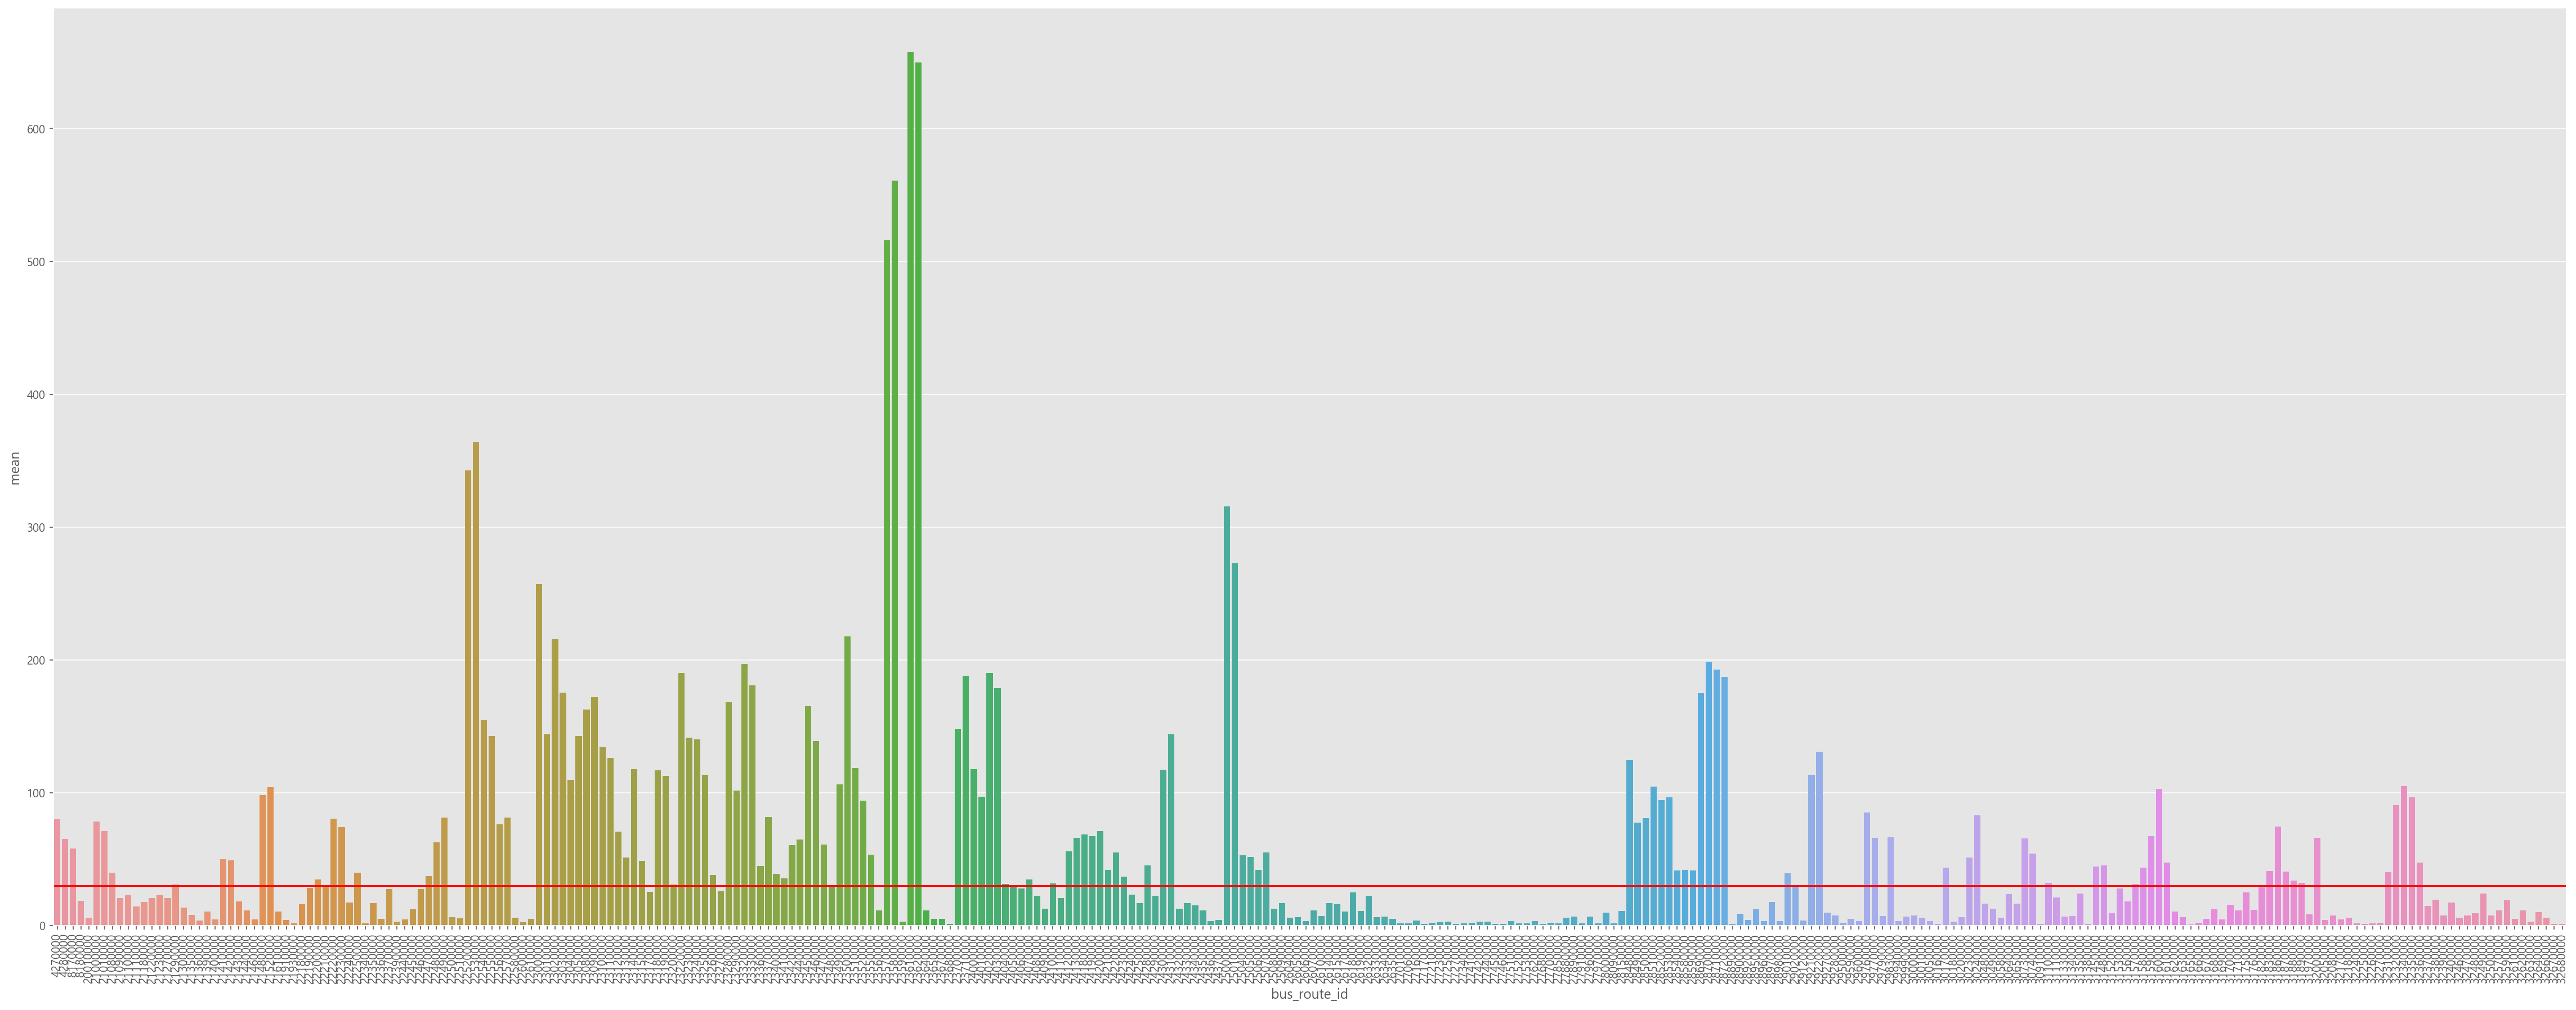

In [58]:
plt.figure(figsize=(40,15))
plt.axhline(y=30, color='red')
plt.xticks(rotation='vertical')
sns.barplot(x='bus_route_id', y='mean',data=a)